In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [73]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [74]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
d

In [75]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

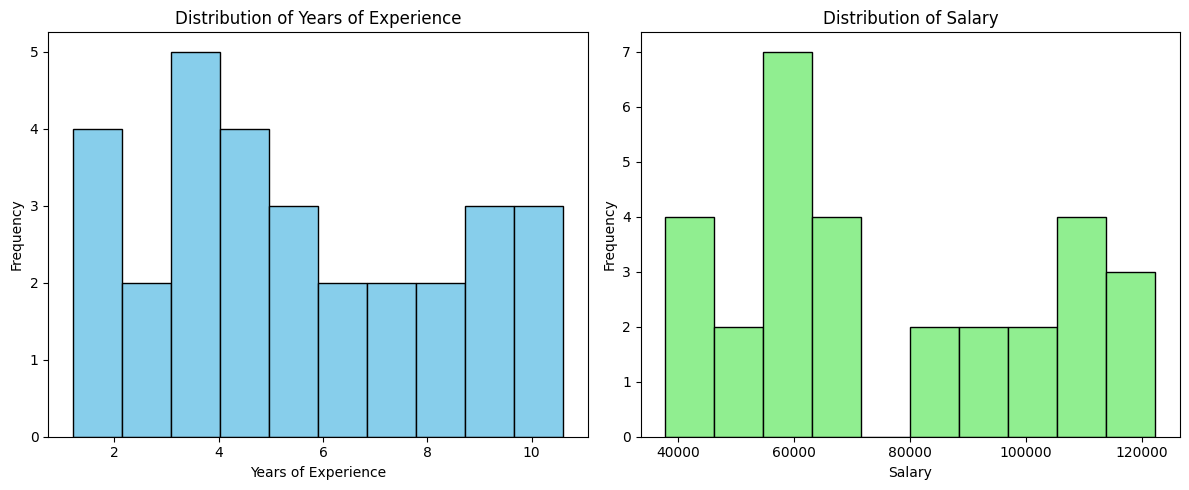

In [76]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df['Salary'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

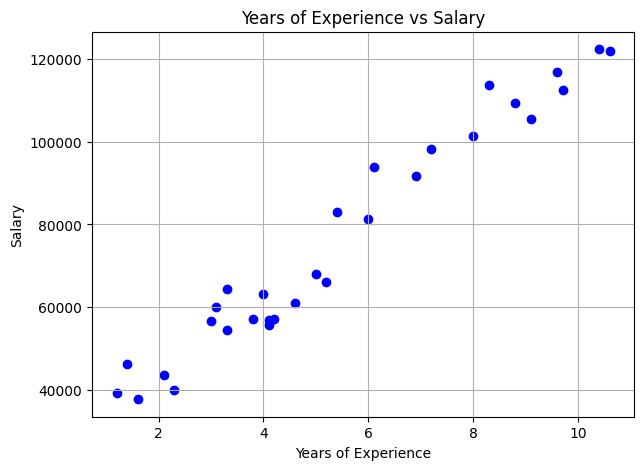

In [77]:
plt.figure(figsize=(7,5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

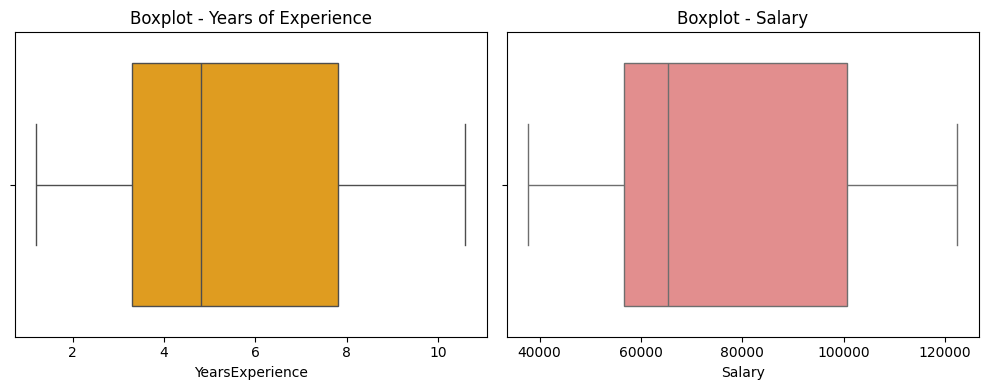

In [78]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['YearsExperience'], color='orange')
plt.title("Boxplot - Years of Experience")

plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'], color='lightcoral')
plt.title("Boxplot - Salary")

plt.tight_layout()
plt.show()


In [79]:
print("\nSkewness of Each Column:")
skew_values = {}
for column in df.select_dtypes(include=[np.number]).columns:
    skew_value = df[column].skew()
    skew_values[column] = skew_value
    print(f"{column}: {skew_value:.3f}")
    if abs(skew_value) < 0.5:
        print(f"--> {column} is fairly symmetric")
    elif abs(skew_value) < 1:
        print(f"--> {column} is moderately skewed")
    else:
        print(f"--> {column} is highly skewed")



Skewness of Each Column:
YearsExperience: 0.380
--> YearsExperience is fairly symmetric
Salary: 0.354
--> Salary is fairly symmetric


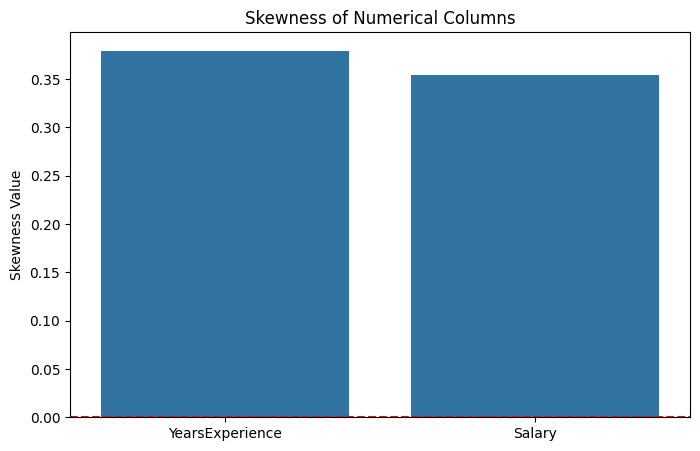

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(skew_values.keys()), y=list(skew_values.values()))
plt.title("Skewness of Numerical Columns")
plt.ylabel("Skewness Value")
plt.axhline(0, color='red', linestyle='--')
plt.show()

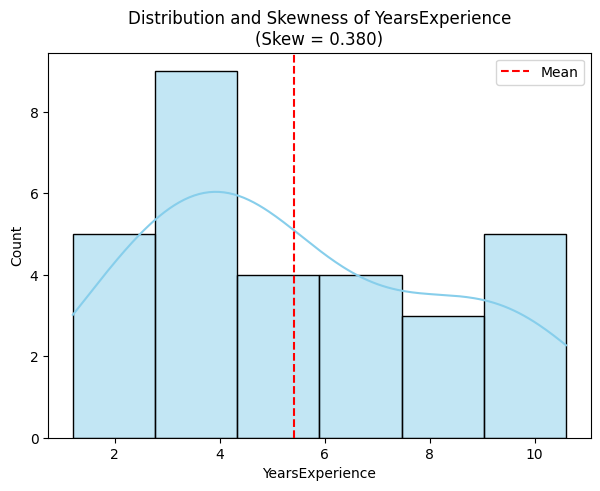

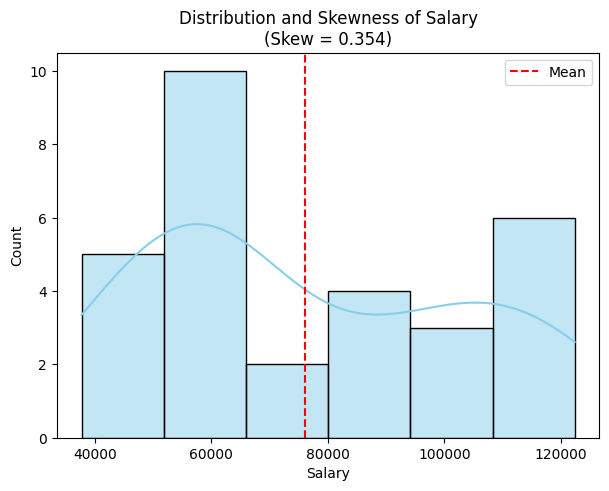

In [81]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.title(f"Distribution and Skewness of {col}\n(Skew = {df[col].skew():.3f})")
    plt.legend()
    plt.show()

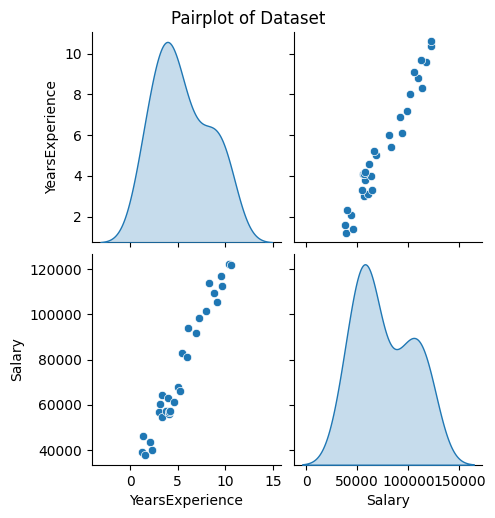

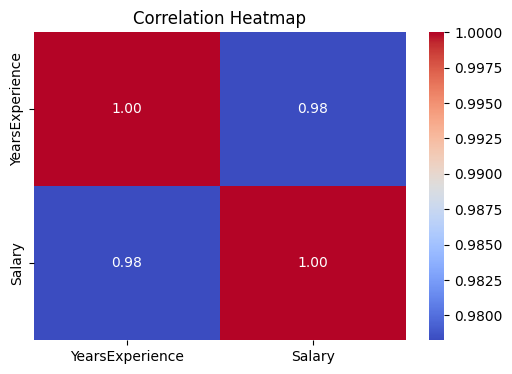

In [82]:
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Dataset", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [83]:
print("\n📋 Observations:")
print("1️⃣ 'YearsExperience' and 'Salary' are strongly positively correlated (≈ 0.97).")
print("2️⃣ Skewness values close to 0 → distributions are nearly symmetric.")
print("3️⃣ 'Age' was added synthetically — slight random skew due to integer distribution.")
print("4️⃣ No significant outliers; suitable for regression.")


📋 Observations:
1️⃣ 'YearsExperience' and 'Salary' are strongly positively correlated (≈ 0.97).
2️⃣ Skewness values close to 0 → distributions are nearly symmetric.
3️⃣ 'Age' was added synthetically — slight random skew due to integer distribution.
4️⃣ No significant outliers; suitable for regression.


In [84]:
# Split Data into Train/Test

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)

(24, 1)
(6, 1)


In [85]:
#  Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
# Model parameters
slope = model.coef_
intercept = model.intercept_
print("\nModel Coefficients (Slope):", slope)
print("Model Intercept:", intercept)



Model Coefficients (Slope): [9423.81532303]
Model Intercept: 24380.20147947369


In [87]:
#  Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nTraining R²: {r2_train:.4f}")
print(f"Testing R²: {r2_test:.4f}")
print(f"Training MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"Testing MSE: {mean_squared_error(y_test, y_pred_test):.4f}")


Training R²: 0.9645
Testing R²: 0.9024
Training MSE: 27102249.7313
Testing MSE: 49830096.8559


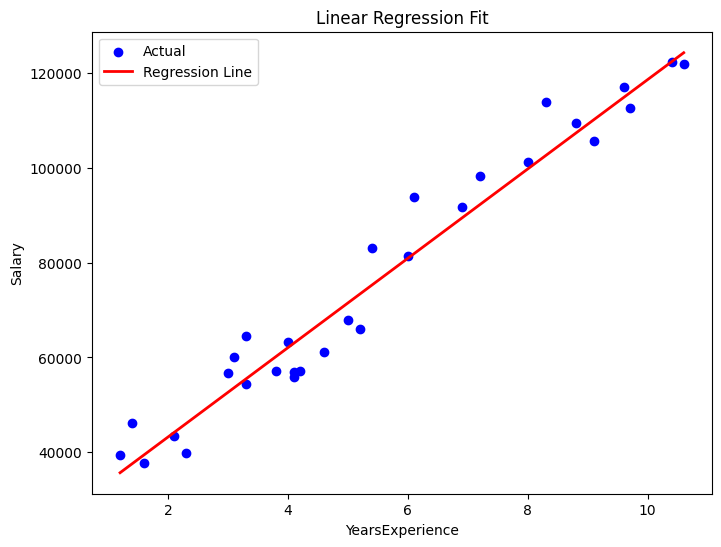

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression Fit")
plt.xlabel(X.columns[0])
plt.ylabel(y.name)
plt.legend()
plt.show()